In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/ADMIN/FIREBLAZE/FIREBLAZE ML/Black Friday Sales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Checking Distribution

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3368\370290696.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'],bins=25)


<Axes: title={'center': 'Purchase Distribution'}, xlabel='Purchase', ylabel='Density'>

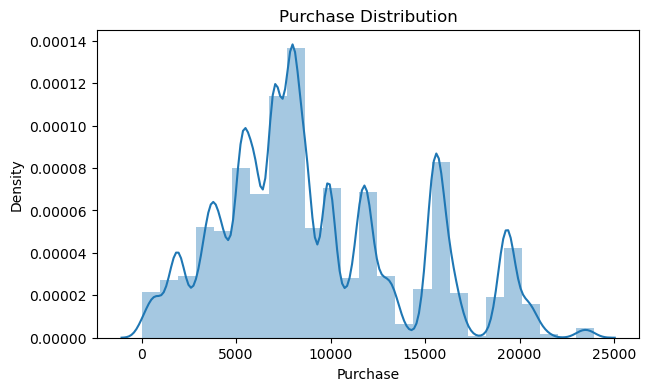

In [6]:
plt.figure(figsize=(7,4))
plt.title("Purchase Distribution")
sns.distplot(df['Purchase'],bins=25)

#First part of the graph has a normal distribution and later forming some peaks in the graph
#Evaluating the whole graph,it has a normal distribution

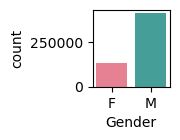

In [7]:
df['Gender'].value_counts()
plt.figure(figsize=(1,1))
sns.countplot(x ='Gender', data = df, palette ='husl')
plt.show()
#We observe that male customers have done more transactions than female during Black Friday sales.

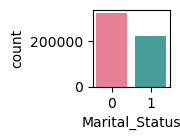

In [8]:
plt.figure(figsize=(1,1))
sns.countplot(x='Marital_Status',data=df,palette='husl')
plt.show()
#There are more unmarried customers in the dataset who purchase more during Black Friday sales.
#Majority of the buyers are single

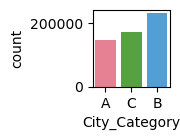

In [9]:
plt.figure(figsize=(1,1))
sns.countplot(x='City_Category',data=df,palette='husl')
plt.show()

#If we group by City_Category to see the variation with purchase
#We can see that city category B has made the most number of purchases followed by C.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3368\4088996167.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


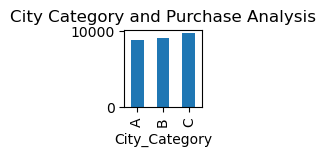

In [10]:
plt.figure(figsize=(1,1))
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()
#We then observe that the customers from city C spends the most

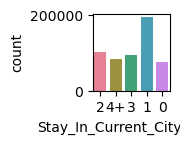

In [11]:
plt.figure(figsize=(1,1))
sns.countplot(x ='Stay_In_Current_City_Years',data=df,palette='husl')
plt.show()
#It looks like the longest customer is living in that city are less prone to buy new things 
#whereas Customers which are new in town are more likely to take advantage of the low prices in Black Friday Sales.

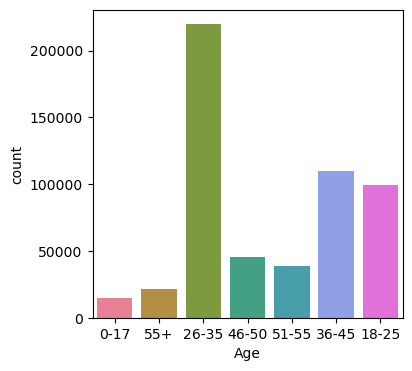

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='Age',data=df,palette='husl')
plt.show()
#We can see that the Age group (26–35) makes the most no. of purchases during Black Friday Sales.

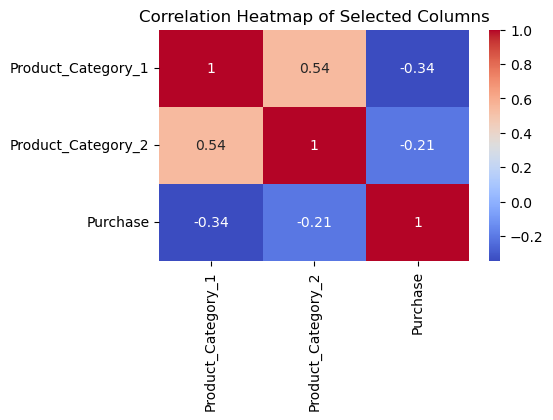

In [13]:
df1=df[["Product_Category_1","Product_Category_2","Purchase"]]
correlation=df1.corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Columns")
plt.show()


## Preprocessing dataset

In [14]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
Product_Category_3=(df["Product_Category_3"].isnull().sum()/len(df["Product_Category_3"]))*100
Product_Category_3
#the mentioned column has null values more than 50% 

69.67265865311198

In [16]:
df=df.drop(columns=["Product_Category_3"])

In [17]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)

In [18]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Purchase                      18105
dtype: int64

In [19]:
df=df.drop(["User_ID","Product_ID"],axis=1)

#We can drop User_ID and Product_ID for model prediction as it has more unique values Or
#if not the results will be biased to User_ID or Product_ID


## Converting categorical data into numerical

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LE=LabelEncoder()

In [22]:
categorical_columns=['Gender','Age','City_Category','Stay_In_Current_City_Years']

In [23]:
for column in categorical_columns:
    df[column] = LE.fit_transform(df[column])


## Checking skewness

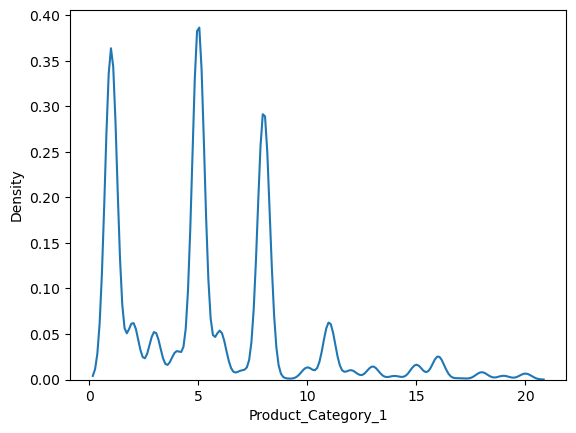

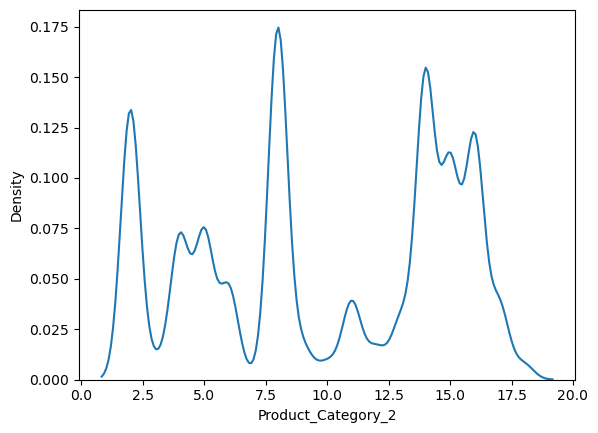

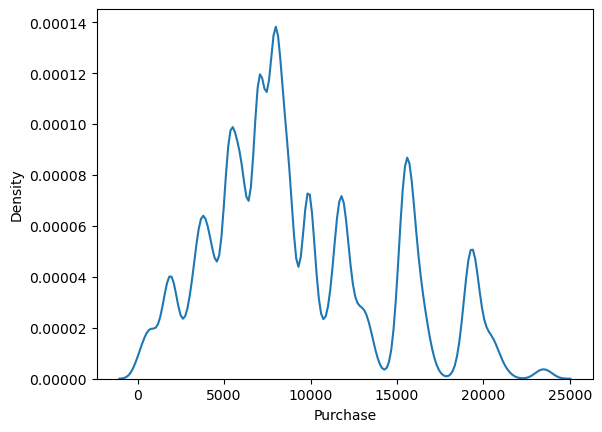

In [24]:
for i in df1:
    sns.kdeplot(data=df1,x=i)
    plt.show()
    
#from this we can see Product_Category_1 is rightly skewed

## Treating skewness of column with PowerTransformer

In [25]:
from sklearn.preprocessing import PowerTransformer

In [26]:
PT=PowerTransformer()

In [27]:
columns_to_scale=['Product_Category_1','Product_Category_2','Purchase']
for column in columns_to_scale:
    df[column] = PT.fit_transform(df[[column]])

## Checking & Treating outliers

In [28]:
lst=df[['Product_Category_1','Purchase']]
for col in lst:
    Q3=df[col].quantile(0.75)
    Q1=df[col].quantile(0.25)
    IQR=Q3-Q1
    uw=Q3+1.5*IQR
    lw=Q1-1.5*IQR
df=df[(df[col]>=lw)&(df[col]<=uw)]

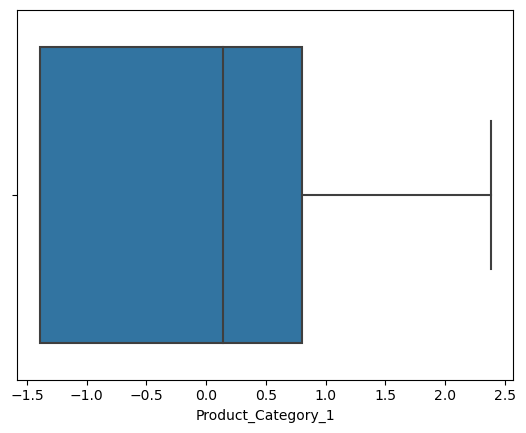

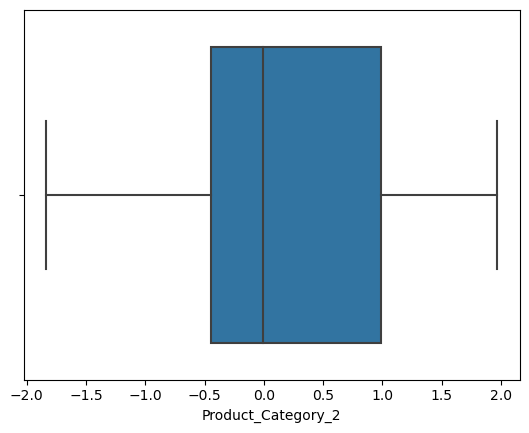

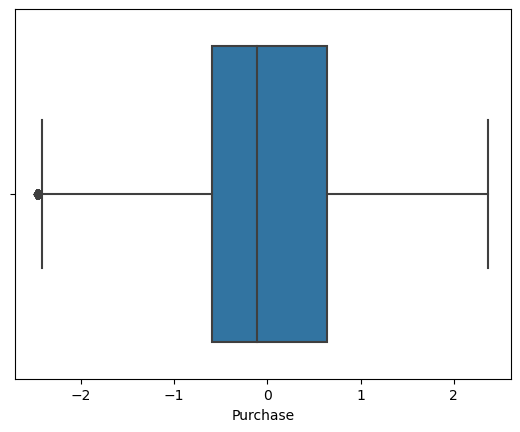

In [29]:
for i in df1:
    sns.boxplot(data=df,x=i)
    plt.show()

## Split the data for training & testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop('Purchase',axis=1)
y=df['Purchase']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

## LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression,Lasso

In [34]:
LR=LinearRegression().fit(x_train,y_train)

In [35]:
LR.score(x_train,y_train)

0.18770518525090651

In [36]:
y_pred=LR.predict(x_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

print("r2_score:            ",(r2_score(y_test,y_pred)))
print("mean_squared_error:  ",(mean_squared_error(y_test,y_pred)))
print("mean_absolute_error: ",(mean_absolute_error(y_test,y_pred)))

r2_score:             0.1815723738838485
mean_squared_error:   0.7774466714826213
mean_absolute_error:  0.6637134352307733


In [39]:
residual=y_test-y_pred #Residuals are the differences between the observed values and the values predicted by model

## DecisionTreeRegressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
DTR=DecisionTreeRegressor(random_state=0).fit(x_train,y_train)

In [42]:
DTR.score(x_train,y_train)

0.7484293563655522

In [43]:
y_pred=DTR.predict(x_test)

In [44]:
r2_score(y_test,y_pred)

0.6053220765476833

In [45]:
print("r2_score:            ",(r2_score(y_test,y_pred)))
print("mean_squared_error:  ",(mean_squared_error(y_test,y_pred)))
print("mean_absolute_error: ",(mean_absolute_error(y_test,y_pred)))

r2_score:             0.6053220765476833
mean_squared_error:   0.3749152986829032
mean_absolute_error:  0.45428613008948127


## RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
RFR=RandomForestRegressor(n_estimators=100,max_depth=15,random_state=0).fit(x_train,y_train)

In [48]:
DTR.score(x_train,y_train)

0.7484293563655522

In [49]:
y_pred=RFR.predict(x_test)

In [50]:
print("r2_score:            ",(r2_score(y_test,y_pred)))
print("mean_squared_error:  ",(mean_squared_error(y_test,y_pred)))
print("mean_absolute_error: ",(mean_absolute_error(y_test,y_pred)))

r2_score:             0.6593111530508973
mean_squared_error:   0.3236296058684633
mean_absolute_error:  0.4357836320832321


## KNeighborsRegressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
KNR=KNeighborsRegressor(n_neighbors=15).fit(x_train,y_train)

In [53]:
KNR.score(x_train,y_train)

0.48710993328704766

In [54]:
y_pred=KNR.predict(x_test)

In [55]:
print("r2_score:            ",(r2_score(y_test,y_pred)))
print("mean_squared_error:  ",(mean_squared_error(y_test,y_pred)))
print("mean_absolute_error: ",(mean_absolute_error(y_test,y_pred)))

r2_score:             0.41852151822054695
mean_squared_error:   0.5523622318854204
mean_absolute_error:  0.5494539115276138
